**Victor Cabrera**

**Marcos de referencia**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=6eec90976e88e78ee645c19a64420283e0ec97bca0e7daf54ea556e59ed094c0
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
!pip install findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
# Initializing a Spark session
from pyspark.sql import SparkSession

from pyspark.sql import SQLContext

spark = SparkSession.builder.appName('feature-engine').getOrCreate()

sqlContext = SQLContext(spark)


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# Generamos datos ficticios

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Generar fechas aleatorias
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date)

# Definir categorías
categorias = ["COMIDA PARA PERROS", "COMIDA PARA GATOS", "COMIDA PARA AVES", "COMIDA PARA PECES"]

# Crear datos aleatorios
data = {
    'FECHA': np.random.choice(date_range, 100),
    'CATEGORIAS': np.random.choice(categorias, 100),
    'VENTAS': np.random.randint(1, 100, 100),  # Ventas entre 1 y 100
    'INGRESO': np.random.uniform(10.0, 500.0, 100).round(2),  # Ingreso entre 10.0 y 500.0
    'PROMOCIONES': np.random.choice([0, 1], 100),  # 0 o 1 para indicar si hubo promoción
    'DESCUENTOS': np.random.uniform(0.0, 50.0, 100).round(2)  # Descuentos entre 0.0 y 50.0
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)


        FECHA          CATEGORIAS  VENTAS  INGRESO  PROMOCIONES  DESCUENTOS
0  2023-10-14   COMIDA PARA GATOS      78    13.77            1       30.39
1  2023-09-18   COMIDA PARA GATOS      77   358.91            1       40.19
2  2023-12-13   COMIDA PARA PECES      14   139.21            0       26.67
3  2023-10-05    COMIDA PARA AVES      48   438.01            0       48.85
4  2023-05-12   COMIDA PARA GATOS      51    69.49            1       35.33
..        ...                 ...     ...      ...          ...         ...
95 2023-05-10   COMIDA PARA GATOS      39   264.19            1        9.75
96 2023-10-10   COMIDA PARA GATOS      12   348.19            0        5.23
97 2023-01-01   COMIDA PARA PECES      74    35.96            1        4.77
98 2023-01-13   COMIDA PARA GATOS      79   182.36            1       23.05
99 2023-07-18  COMIDA PARA PERROS      57   110.66            0        7.94

[100 rows x 6 columns]


# Analisis exploratorio de los datos

In [ ]:
df.head(10)

,FECHA,CATEGORIAS,VENTAS,INGRESO,PROMOCIONES,DESCUENTOS,AÑO,MES
0,2023-03-24,COMIDA PARA PERROS,1,232.71,0,37.03,2023,3
1,2023-01-03,COMIDA PARA AVES,76,69.52,0,5.20,2023,1
2,2023-08-18,COMIDA PARA AVES,47,240.82,0,35.48,2023,8
3,2023-04-21,COMIDA PARA GATOS,37,351.19,1,27.39,2023,4
4,2023-04-11,COMIDA PARA GATOS,14,81.36,0,7.47,2023,4
5,2023-10-13,COMIDA PARA PECES,34,393.04,0,48.09,2023,10
6,2023-12-20,COMIDA PARA GATOS,24,212.39,1,0.58,2023,12
7,2023-07-30,COMIDA PARA PERROS,13,369.43,0,14.46,2023,7
8,2023-07-28,COMIDA PARA GATOS,37,229.18,1,14.84,2023,7
9,2023-05-21,COMIDA PARA PERROS,97,353.83,1,4.88,2023,5


In [ ]:
# Mostrar el esquema del DataFrame
print("\n   ---------- Esquema del DataFrame -----------")
print(df.info())



   ---------- Esquema del DataFrame -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        100 non-null    datetime64[ns]
 1   CATEGORIAS   100 non-null    object        
 2   VENTAS       100 non-null    int64         
 3   INGRESO      100 non-null    float64       
 4   PROMOCIONES  100 non-null    int64         
 5   DESCUENTOS   100 non-null    float64       
 6   AÑO          100 non-null    int32         
 7   MES          100 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(1)
memory usage: 5.6+ KB
None


In [ ]:
# Mostrar el número de filas y columna
df.shape

(100, 8)

# Análisis descriptivo

In [ ]:
# Análisis descriptivo
print("Análisis descriptivo:")
print(df.describe(include='all'))  # Incluye todas las columnas

Análisis descriptivo:
                      FECHA        CATEGORIAS     VENTAS     INGRESO  \
count                   100               100  100.00000  100.000000   
unique                  NaN                 4        NaN         NaN   
top                     NaN  COMIDA PARA AVES        NaN         NaN   
freq                    NaN                27        NaN         NaN   
mean    2023-07-03 06:14:24               NaN   51.64000  249.003400   
min     2023-01-01 00:00:00               NaN    1.00000   13.770000   
25%     2023-04-07 18:00:00               NaN   28.00000  124.860000   
50%     2023-07-14 12:00:00               NaN   51.50000  244.910000   
75%     2023-09-28 18:00:00               NaN   74.25000  361.775000   
max     2023-12-28 00:00:00               NaN   99.00000  497.240000   
std                     NaN               NaN   27.51621  139.966682   

        PROMOCIONES  DESCUENTOS  
count    100.000000  100.000000  
unique          NaN         NaN  
top        

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Generar fechas aleatorias
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date)

# Definir categorías
categorias = ["COMIDA PARA PERROS", "COMIDA PARA GATOS", "COMIDA PARA AVES", "COMIDA PARA PECES"]

# Crear datos aleatorios
data = {
    'FECHA': np.random.choice(date_range, 100),
    'CATEGORIAS': np.random.choice(categorias, 100),
    'VENTAS': np.random.randint(1, 100, 100),  # Ventas entre 1 y 100
    'INGRESO': np.random.uniform(10.0, 500.0, 100).round(2),  # Ingreso entre 10.0 y 500.0
    'PROMOCIONES': np.random.choice([0, 1], 100),  # 0 o 1 para indicar si hubo promoción
    'DESCUENTOS': np.random.uniform(0.0, 50.0, 100).round(2)  # Descuentos entre 0.0 y 50.0
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Descripción de cada variable
print("   ---------- Descripción de la variable 'FECHA' -----------")
print(df['FECHA'].describe())
print("\n   ---------- Descripción de la variable 'CATEGORIAS' -----------")
print(df['CATEGORIAS'].value_counts())
print("\n   ---------- Descripción de la variable 'VENTAS' -----------")
print(df['VENTAS'].describe())
print("\n   ---------- Descripción de la variable 'INGRESO' -----------")
print(df['INGRESO'].describe())
print("\n   ---------- Descripción de la variable 'PROMOCIONES' -----------")
print(df['PROMOCIONES'].value_counts())
print("\n   ---------- Descripción de la variable 'DESCUENTOS' -----------")
print(df['DESCUENTOS'].describe())


   ---------- Descripción de la variable 'FECHA' -----------
count                    100
mean     2023-07-08 02:52:48
min      2023-01-02 00:00:00
25%      2023-04-07 06:00:00
50%      2023-06-30 12:00:00
75%      2023-10-25 18:00:00
max      2023-12-30 00:00:00
Name: FECHA, dtype: object

   ---------- Descripción de la variable 'CATEGORIAS' -----------
CATEGORIAS
COMIDA PARA PERROS    28
COMIDA PARA PECES     26
COMIDA PARA AVES      24
COMIDA PARA GATOS     22
Name: count, dtype: int64

   ---------- Descripción de la variable 'VENTAS' -----------
count    100.000000
mean      52.300000
std       28.263014
min        2.000000
25%       28.750000
50%       52.000000
75%       77.000000
max       99.000000
Name: VENTAS, dtype: float64

   ---------- Descripción de la variable 'INGRESO' -----------
count    100.000000
mean     234.061200
std      152.856806
min       14.030000
25%       98.555000
50%      230.350000
75%      383.390000
max      494.660000
Name: INGRESO, dtype: float64

# Análisis Predictivo

 predicen las ventas (VENTAS) en función de otras variables (INGRESO, PROMOCIONES, DESCUENTOS)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar fechas aleatorias
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date)

# Definir categorías
categorias = ["COMIDA PARA PERROS", "COMIDA PARA GATOS", "COMIDA PARA AVES", "COMIDA PARA PECES"]

# Crear datos aleatorios
data = {
    'FECHA': np.random.choice(date_range, 100),
    'CATEGORIAS': np.random.choice(categorias, 100),
    'VENTAS': np.random.randint(1, 100, 100),  # Ventas entre 1 y 100
    'INGRESO': np.random.uniform(10.0, 500.0, 100).round(2),  # Ingreso entre 10.0 y 500.0
    'PROMOCIONES': np.random.choice([0, 1], 100),  # 0 o 1 para indicar si hubo promoción
    'DESCUENTOS': np.random.uniform(0.0, 50.0, 100).round(2)  # Descuentos entre 0.0 y 50.0
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Selección de características y variable objetivo
X = df[['INGRESO', 'PROMOCIONES', 'DESCUENTOS']]
y = df['VENTAS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("   ---------- Resultados del Modelo de Regresión Lineal -----------")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Mostrar algunas predicciones
predictions_df = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred
})
print("\n   ---------- Comparación de Valores Reales y Predicciones -----------")
print(predictions_df.head(10))


   ---------- Resultados del Modelo de Regresión Lineal -----------
Coeficientes: [ 0.007554   -6.75985312  0.03255202]
Intercepto: 41.30858241513788
Error Cuadrático Medio (MSE): 1012.7084431922253
Coeficiente de Determinación (R^2): -0.11112985672331743

   ---------- Comparación de Valores Reales y Predicciones -----------
    Real  Predicción
83     8   37.847939
53    17   44.379394
70    89   44.065104
45    33   46.355684
44    70   38.855944
39     5   42.037037
22    91   43.678753
80    50   36.150020
10    43   36.584011
0     88   42.314840


# Análisis de series temporales

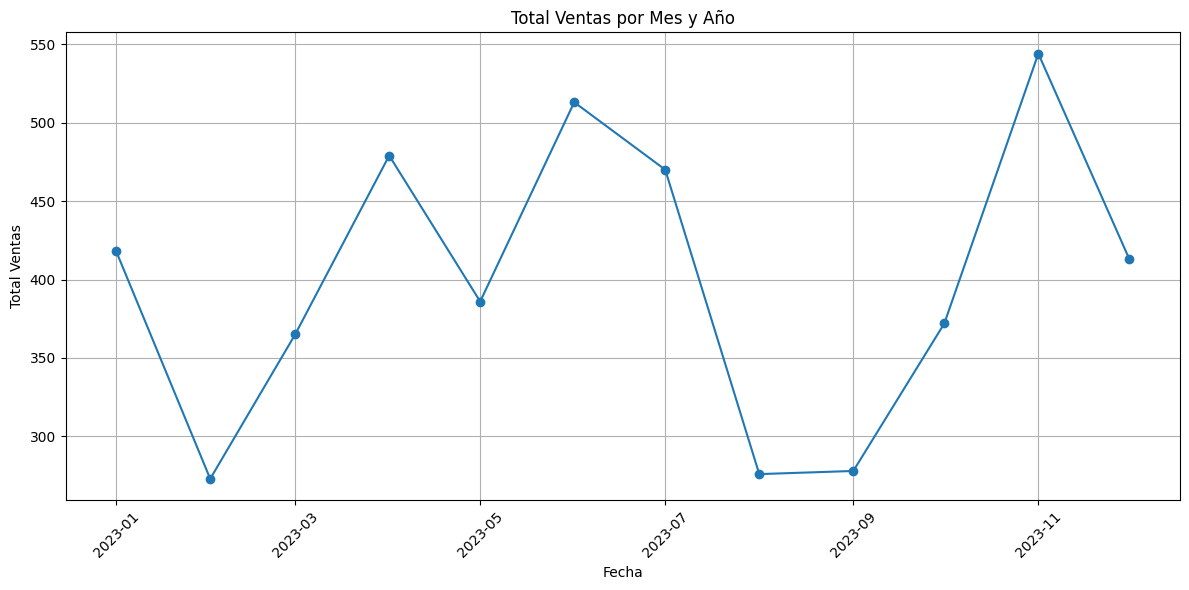

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Generar fechas aleatorias
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date)

# Definir categorías
categorias = ["COMIDA PARA PERROS", "COMIDA PARA GATOS", "COMIDA PARA AVES", "COMIDA PARA PECES"]

# Crear datos aleatorios
data = {
    'FECHA': np.random.choice(date_range, 100),
    'CATEGORIAS': np.random.choice(categorias, 100),
    'VENTAS': np.random.randint(1, 100, 100),  # Ventas entre 1 y 100
    'INGRESO': np.random.uniform(10.0, 500.0, 100).round(2),  # Ingreso entre 10.0 y 500.0
    'PROMOCIONES': np.random.choice([0, 1], 100),  # 0 o 1 para indicar si hubo promoción
    'DESCUENTOS': np.random.uniform(0.0, 50.0, 100).round(2)  # Descuentos entre 0.0 y 50.0
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Convertir la columna FECHA a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Agrupar por año y mes, y sumar las ventas
df['AÑO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month
ventas_mensuales = df.groupby(['AÑO', 'MES'])['VENTAS'].sum().reset_index()

# Crear una columna de fecha para la visualización
ventas_mensuales['FECHA'] = pd.to_datetime(ventas_mensuales['AÑO'].astype(str) + '-' + ventas_mensuales['MES'].astype(str) + '-01')

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales['FECHA'], ventas_mensuales['VENTAS'], marker='o')
plt.title('Total Ventas por Mes y Año')
plt.xlabel('Fecha')
plt.ylabel('Total Ventas')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Guardar el gráfico como imagen PNG
plt.savefig('Total Ventas por Mes y Año.png')

<Figure size 640x480 with 0 Axes>

# Segmentación de datos

Suma total de ventas por categoria

           CATEGORIAS  VENTAS
0    COMIDA PARA AVES    1404
1   COMIDA PARA GATOS    1200
2   COMIDA PARA PECES    1405
3  COMIDA PARA PERROS    1013


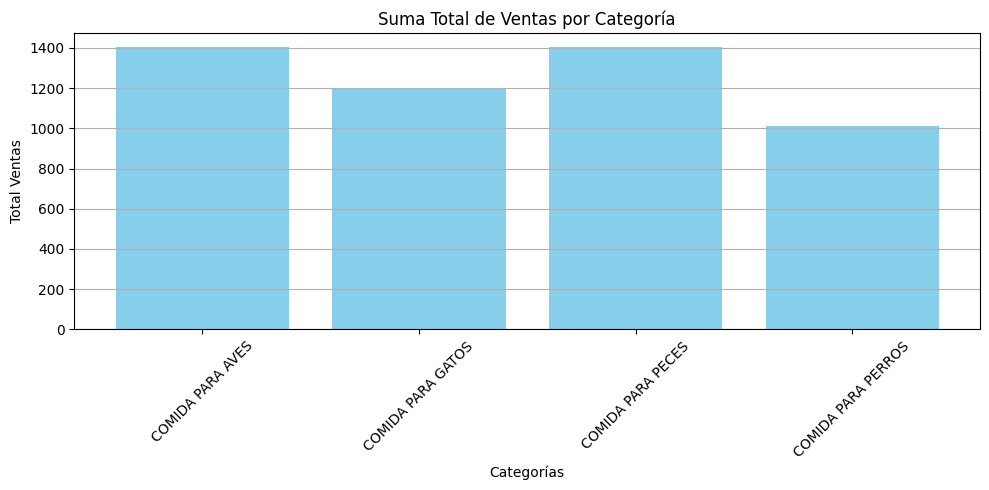

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Generar fechas aleatorias
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date)

# Definir categorías
categorias = ["COMIDA PARA PERROS", "COMIDA PARA GATOS", "COMIDA PARA AVES", "COMIDA PARA PECES"]

# Crear datos aleatorios
data = {
    'FECHA': np.random.choice(date_range, 100),
    'CATEGORIAS': np.random.choice(categorias, 100),
    'VENTAS': np.random.randint(1, 100, 100),  # Ventas entre 1 y 100
    'INGRESO': np.random.uniform(10.0, 500.0, 100).round(2),  # Ingreso entre 10.0 y 500.0
    'PROMOCIONES': np.random.choice([0, 1], 100),  # 0 o 1 para indicar si hubo promoción
    'DESCUENTOS': np.random.uniform(0.0, 50.0, 100).round(2)  # Descuentos entre 0.0 y 50.0
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Convertir la columna FECHA a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Calcular la suma total de ventas por categoría
ventas_por_categoria = df.groupby('CATEGORIAS')['VENTAS'].sum().reset_index()

# Mostrar el resultado
print(ventas_por_categoria)

# Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.bar(ventas_por_categoria['CATEGORIAS'], ventas_por_categoria['VENTAS'], color='skyblue')
plt.title('Suma Total de Ventas por Categoría')
plt.xlabel('Categorías')
plt.ylabel('Total Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Guardar el gráfico como imagen PNG
plt.savefig('Suma Total de Ventas por Categoría.png')

<Figure size 640x480 with 0 Axes>

# Análisis de segmentación de datos

Suma total de ventas por categoria y mes

     AÑO  MES          CATEGORIAS  VENTAS
0   2023    1    COMIDA PARA AVES     164
1   2023    1   COMIDA PARA GATOS      89
2   2023    1   COMIDA PARA PECES      81
3   2023    1  COMIDA PARA PERROS      93
4   2023    2    COMIDA PARA AVES     221
5   2023    2   COMIDA PARA GATOS      92
6   2023    2  COMIDA PARA PERROS      86
7   2023    3    COMIDA PARA AVES      53
8   2023    3   COMIDA PARA GATOS      67
9   2023    3   COMIDA PARA PECES     306
10  2023    3  COMIDA PARA PERROS       1
11  2023    4    COMIDA PARA AVES     118
12  2023    4   COMIDA PARA GATOS     327
13  2023    4   COMIDA PARA PECES      56
14  2023    4  COMIDA PARA PERROS      70
15  2023    5    COMIDA PARA AVES      17
16  2023    5   COMIDA PARA PECES     134
17  2023    5  COMIDA PARA PERROS      97
18  2023    6    COMIDA PARA AVES      26
19  2023    6   COMIDA PARA GATOS      94
20  2023    6  COMIDA PARA PERROS      29
21  2023    7   COMIDA PARA GATOS     291
22  2023    7   COMIDA PARA PECES 

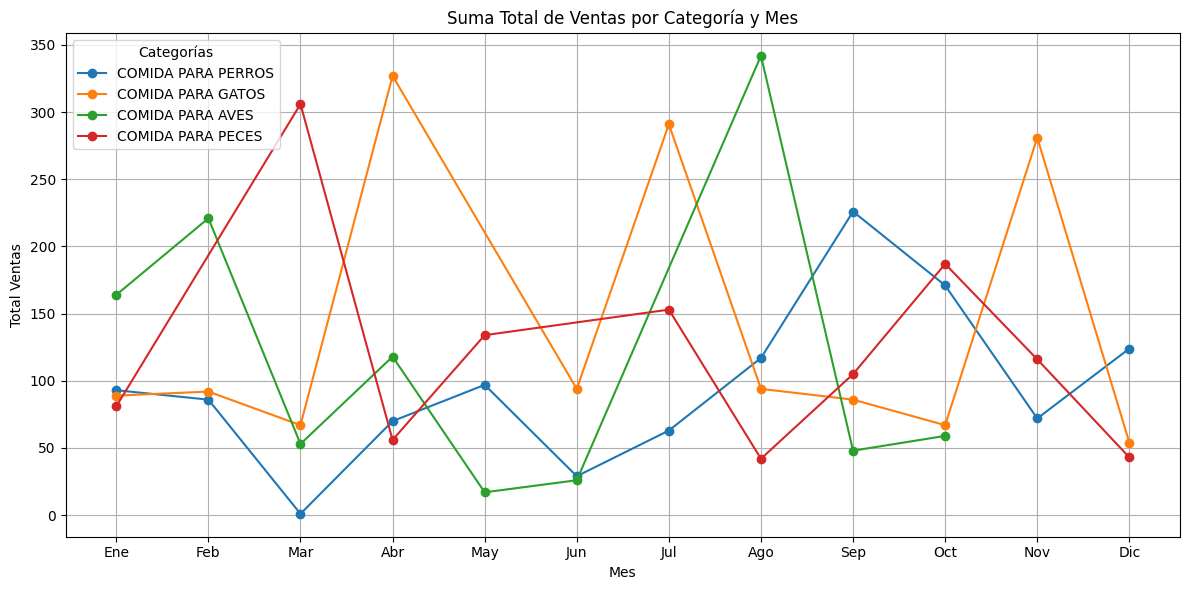

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Generar fechas aleatorias
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date)

# Definir categorías
categorias = ["COMIDA PARA PERROS", "COMIDA PARA GATOS", "COMIDA PARA AVES", "COMIDA PARA PECES"]

# Crear datos aleatorios
data = {
    'FECHA': np.random.choice(date_range, 100),
    'CATEGORIAS': np.random.choice(categorias, 100),
    'VENTAS': np.random.randint(1, 100, 100),  # Ventas entre 1 y 100
    'INGRESO': np.random.uniform(10.0, 500.0, 100).round(2),  # Ingreso entre 10.0 y 500.0
    'PROMOCIONES': np.random.choice([0, 1], 100),  # 0 o 1 para indicar si hubo promoción
    'DESCUENTOS': np.random.uniform(0.0, 50.0, 100).round(2)  # Descuentos entre 0.0 y 50.0
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Convertir la columna FECHA a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Extraer el año y el mes de la fecha
df['AÑO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month

# Calcular la suma total de ventas por categoría y mes
ventas_por_categoria_mes = df.groupby(['AÑO', 'MES', 'CATEGORIAS'])['VENTAS'].sum().reset_index()

# Mostrar el resultado
print(ventas_por_categoria_mes)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
for categoria in categorias:
    subset = ventas_por_categoria_mes[ventas_por_categoria_mes['CATEGORIAS'] == categoria]
    plt.plot(subset['MES'], subset['VENTAS'], marker='o', label=categoria)

plt.title('Suma Total de Ventas por Categoría y Mes')
plt.xlabel('Mes')
plt.ylabel('Total Ventas')
plt.xticks(ticks=np.arange(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Categorías')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Guardar el gráfico como imagen PNG
plt.savefig('Suma Total de Ventas por Categoría y Mes.png')

<Figure size 640x480 with 0 Axes>

# Crear la Presentación Ejecutiva

Finalmente, crearemos la presentación en PowerPoint.

In [ ]:
!pip install python-pptx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 15.5 MB/s eta 0:00:00


In [ ]:
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear presentación
prs = Presentation()

# Función para agregar un título y un subtítulo
def add_title_slide(title, subtitle):
    slide = prs.slides.add_slide(prs.slide_layouts[0])
    slide.shapes.title.text = title
    slide.placeholders[1].text = subtitle

# Diapositiva de título
add_title_slide("Análisis de Ventas de Comida para Mascotas", "Análisis completo de datos y resultados")

# Estadísticas Descriptivas
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Estadísticas Descriptivas"
desc_stats = df.describe()  # Reemplaza con tu DataFrame de estadísticas descriptivas
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = desc_stats.to_string()

# Gráfico de Predicciones vs Valores Reales
# Suponiendo que hayas guardado el gráfico como 'Predicciones_vs_Valores_Reales.png'
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Total Ventas por Mes y Año"
slide.shapes.add_picture("Total Ventas por Mes y Año.png", Inches(0.5), Inches(1), width=Inches(8))

# Análisis de Ventas a lo Largo del Tiempo
# Suponiendo que hayas guardado el gráfico como 'Ventas_a_lo_Largo_del_Tiempo.png'
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Suma Total de Ventas por Categoría"
slide.shapes.add_picture("Suma Total de Ventas por Categoría.png", Inches(0.5), Inches(1), width=Inches(8))

# Análisis de Promedio de Ventas por Categoría
# Suponiendo que hayas guardado el gráfico como 'Promedio_de_Ventas_por_Categoria.png'
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Suma Total de Ventas por Categoría y Mes"
slide.shapes.add_picture("Suma Total de Ventas por Categoría y Mes.png", Inches(0.5), Inches(1), width=Inches(8))



# Conclusiones
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Conclusiones Finales"
conclusiones = (
    "1. Identificamos las categorías más vendidas y sus tendencias.\n"
    "2. El modelo predictivo proporciona información valiosa sobre ventas.\n"
    "3. Las promociones tienen un impacto significativo en las ventas.\n"
    "4. La optimización sugiere cantidades óptimas para maximizar ganancias."
)
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = conclusiones

# Guardar la presentación
prs.save("Analisis_Ventas_Comida_Mascotas.pptx")


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['FECHA'], data['VENTAS'])
plt.title('Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.savefig('Ventas_a_lo_Largo_del_Tiempo.png')
plt.close()
